# Joint Distributions

## Logical operations

1. Union (or) of events: $$ P(A \cup B) = P(A) + P(B) $$ for exclusive events according the 3rd axiom, for inclusive events, i.e. $AB \neq \emptyset$, we have to discount the events counted twice, therefore $$ P(A \cup B) = P(A) + P(B) - P(A\cap B) $$. This is equivalent to the logical operator *or*. In General: $$  $$
2. Intersection (and) of events: $$ P(A\cap B) = P(A, B) = P(A)P(B)$$ for independent events. There is no unique rule for dependent events, it is given by a joint distribution. This is equivalent to the logical operator *and*.

## Joint distribution

$$ P(a_1 < X_1 < b_1, a_2 < X_2 < b_2, ... , a_N < X_N < b_N) = \int_{a_1}^{b_1} \int_{a_2}^{b_2} ... \int_{a_N}^{b_N} p(x_1, x_2, ..., x_N) dx_1 dx_2 ... dx_N $$

Crossed momenta:

$$ E[(X_i - E[X_i])^n (X_j - E[X_j])^m] = \int_{-\infty}^\infty \int_{-\infty}^\infty (x_i-E[X_i])^n (x_j-E[X_j])^m p(x)dx_i dx_j $$

Covariance:

$$ Cov[X_i, X_j] = E[(X_i - E[X_i]) (X_j - E[X_j])] = \int_{-\infty}^\infty \int_{-\infty}^\infty (x_i-E[X_i]) (x_j-E[X_j]) p(x)dx_i dx_j $$

Marginal distribution:

$$ p(x_1, x_2, ..., x_{i-1}, x_{i+1} , ..., x_N) = \int_{-\infty}^\infty p(x_1, x_2, ..., x_N) dx_i$$

## Bivariated Normal

$$ p(x,y) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2} } \exp \left\{ -\frac{1}{2(1-\rho^2)} \left[ \left(\frac{x-\mu_x}{\sigma_x}\right)^2 + \left(\frac{y-\mu_y}{\sigma_y}\right)^2 -2\rho\left(\frac{x-\mu_x}{\sigma_x}\right)\left(\frac{y-\mu_y}{\sigma_y}\right) \right] \right\} $$

Expected values:

$$ E[X] = \mu_x, ~~~~~  E[Y] = \mu_y$$

Variance:

$$ Var[X] = \sigma_x^2, ~~~~~  Var[Y] = \sigma_y^2$$

Covariance:

$$ Cov[X, Y] = \rho\sigma_x\sigma_y $$

Correlation:

$$ Corr[X, Y] \equiv \frac{Cov[X, Y]}{E[X]E[Y]} = \rho, ~~~~~ -1 < \rho < 1 $$

In [1]:
import numpy as np

In [38]:
sample = np.random.multivariate_normal([.2, .3], [[.1**2, .7*.1*.1], [.7*.1*.1, .1**2]], size=100000)

In [39]:
import matplotlib.pyplot as plt

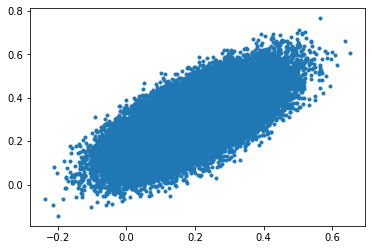

In [40]:
plt.plot(sample[:,0], sample[:,1], '.')

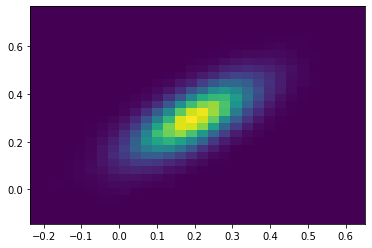

In [41]:
_, _, _, _ = plt.hist2d(sample[:,0], sample[:,1], bins=30)

In [42]:
import seaborn as sns

import pandas as pd

In [43]:
df = pd.DataFrame(sample, columns=['X', 'Y'])

In [44]:
df.head()

,X,Y
0,0.383027,0.253777
1,0.210725,0.261906
2,0.233666,0.322641
3,0.223287,0.343726
4,0.139959,0.217754


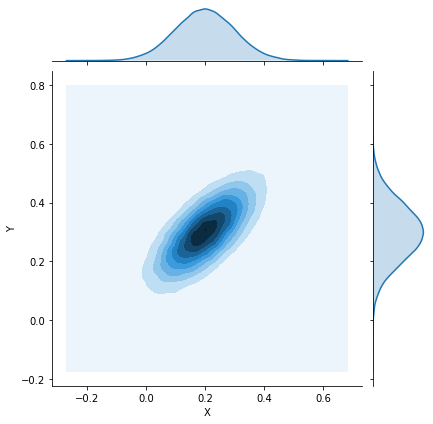

In [45]:
sns.jointplot(df.X, df.Y, kind='kde')

In [46]:
from scipy import stats

In [49]:
mnormal = stats.multivariate_normal([.2, .3], [[.1**2, .7*.1*.1], [.7*.1*.1, .1**2]])

In [82]:
x = np.linspace(-.2, .6, 100)
y = np.linspace(-.2, .8, 100)

X, Y = np.meshgrid(x, y)

In [83]:
XY = np.column_stack((X.ravel(), Y.ravel().ravel()))

In [84]:
PDF = mnormal.pdf(XY).reshape(X.shape)

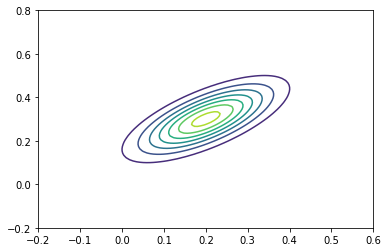

In [85]:
plt.contour(X, Y, PDF)

## Multivariated Normal

$$ p(\mathbf{X}) = \frac{1}{\sqrt{(2 \pi)^{N} \det \mathbf{\Sigma}}} \exp\left[ -\frac{1}{2} (\mathbf{X-M})^T \mathbf{\Sigma}^{-1}(\mathbf{X-M})\right]$$

Where

$$\mathbf{X}=\left( \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N \end{array} \right), ~~~~~ \mathbf{M} = E[\mathbf{X}] = \left( \begin{array}{c} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_N \end{array} \right), ~~~~~ \mathbf{\Sigma}=Cov[\mathbf{X}, \mathbf{X}] = \left( \begin{array}{cccc} \sigma_1^2 & \rho_{1,2}\sigma_1\sigma_2 & \cdots & \rho_{1,N}\sigma_1\sigma_N \\ \rho_{1,2}\sigma_1\sigma_2 & \sigma_2^2 & \cdots & \rho_{2,N}\sigma_2\sigma_N \\ \vdots & \vdots & \ddots & \vdots\\ \rho_{1,N}\sigma_1\sigma_N &  \rho_{2,N}\sigma_2\sigma_N & \cdots & \sigma_N^2\end{array} \right)$$